In [1]:
import os
import sys
import time

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
import tensorflow
import tensorflow as tf
tf.__version__

'2.12.0'

In [5]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [6]:
# Define the total length of the time series
nt = 300
xt = np.array(range(nt))
noise = np.random.uniform(-0.25, 0.25, nt)
x = np.sin(np.pi * xt / 30) + np.cos(np.pi * xt / 10) + xt / 200. + noise

In [7]:
# Define the sizes for training, testing, and validation sets
train_size = 100
test_size = 100
val_size = nt - train_size - test_size

val_size

100

In [8]:
# Split the data into training, testing, and validation sets
train_data = x[:train_size]
test_data = x[train_size:train_size + test_size]
val_data = x[train_size + test_size:]

In [9]:
train_data.shape, test_data.shape, val_data.shape

((100,), (100,), (100,))

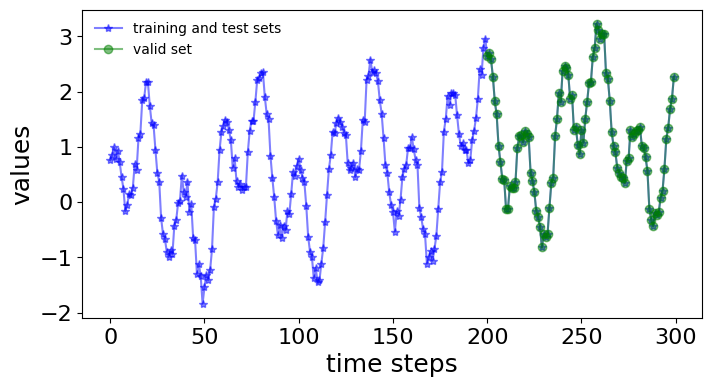

In [10]:
plt.figure(figsize=(8,4))
plt.plot(xt, x, '-*', label='training and test sets', color='b',alpha=0.5)
plt.plot(np.arange(train_size + test_size, nt), val_data, '-o', label='valid set', color='g',alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [11]:
# Define the number of time steps and features
n_steps = 10
n_features = 1

In [12]:
# Reshape the data to fit the LSTM input requirements
def reshape_data(data, n_steps):
    X, Y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        Y.append(data[i + n_steps])
    return np.array(X), np.array(Y)

In [13]:
X_train, Y_train = reshape_data(train_data, n_steps)
X_test, Y_test = reshape_data(test_data, n_steps)
X_val, Y_val = reshape_data(val_data, n_steps)

In [14]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape

((90, 10), (90,), (90, 10), (90,), (90, 10), (90,))

In [15]:
# Reshape the input data to be 3-dimensional (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))

In [16]:
X_train.shape, Y_train.shape,

((90, 10, 1), (90,))

In [17]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
start_time = time.time()

model.fit(X_train, Y_train, epochs=100,  verbose=0)

print("--- predict_optimize_LSTM took: %s seconds ---" % (time.time() - start_time))

--- predict_optimize_LSTM took: 1.9154529571533203 seconds ---


In [19]:
X_val.shape, X_test.shape

((90, 10, 1), (90, 10, 1))

In [20]:
Y_fit= model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [21]:
Y_fit.shape, Y_test.shape

((90, 1), (90,))

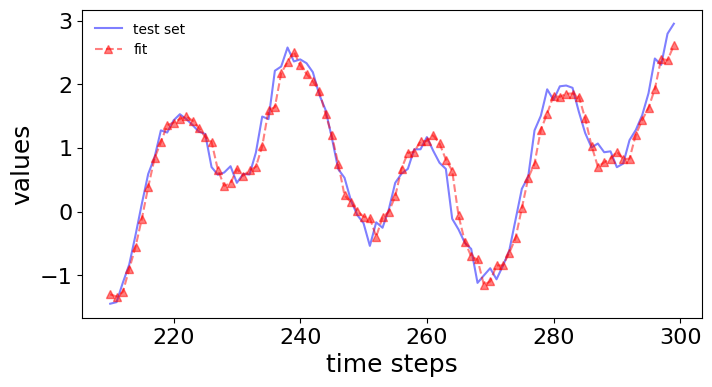

In [22]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(train_size + test_size+n_steps, nt), Y_test, label='test set', color='b',alpha=0.5)
plt.plot(np.arange(train_size + test_size+n_steps, nt), Y_fit, '--^', label='fit', color='r',alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [23]:
# Generate predictions on the validation set
Y_pred = model.predict(X_val)

3/3 [==============================] - 0s 2ms/step


In [24]:
Y_pred.shape, Y_val.shape

((90, 1), (90,))

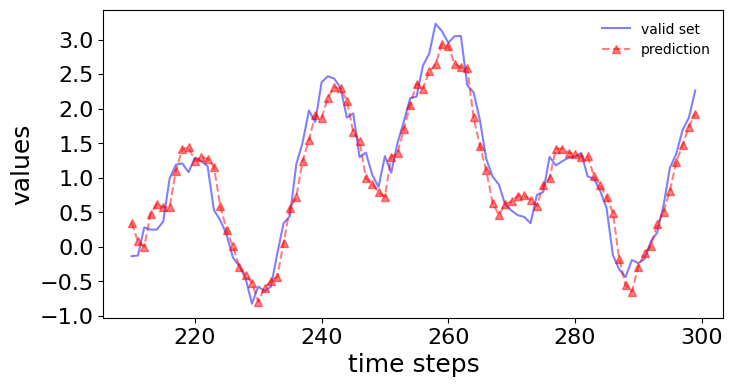

In [25]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(train_size + test_size+n_steps, nt), Y_val, label='valid set', color='b',alpha=0.5)
plt.plot(np.arange(train_size + test_size+n_steps, nt), Y_pred, '--^', label='prediction', color='r',alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

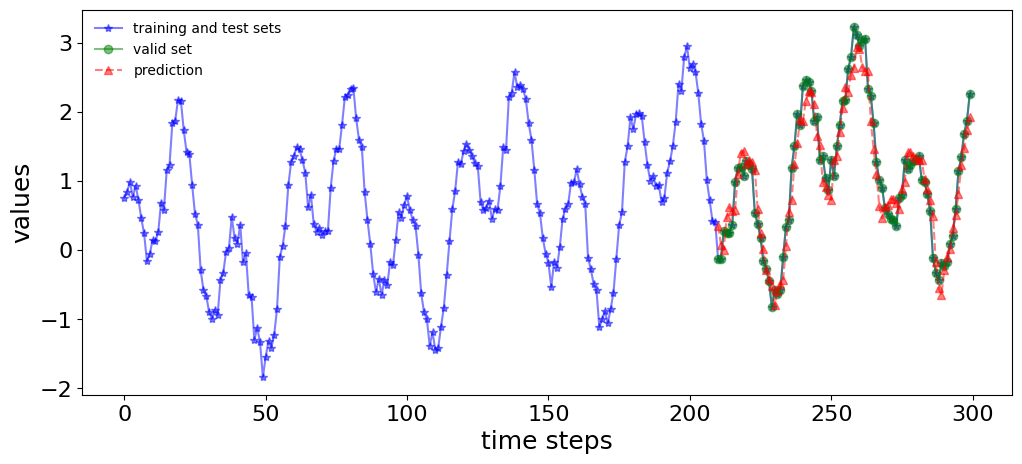

In [26]:
plt.figure(figsize=(12,5))
plt.plot(xt, x, '-*', label='training and test sets', color='b', alpha=0.5)
plt.plot(np.arange(train_size + test_size+n_steps, nt), Y_val, '-o', label='valid set', color='g', alpha=0.5)
plt.plot(np.arange(train_size + test_size+n_steps, nt), Y_pred, '--^', label='prediction', color='red', alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [27]:
MSE = np.square(np.subtract(Y_val,Y_pred)).mean() 

RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.333190122992428


Using Scaler

In [28]:
y_tt = x[:train_size + test_size]
y_tt.shape

(200,)

In [29]:
y= y_tt.reshape(-1, 1)
y.shape

(200, 1)

In [30]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y.reshape(-1, 1))
y_trans = scaler.transform(y.reshape(-1, 1))

In [31]:
y_valid=x[train_size + test_size:]
y_valid.shape

(100,)

In [32]:
scaler = scaler.fit(y_valid.reshape(-1, 1))
y_valid_trans = scaler.transform(y_valid.reshape(-1, 1))

In [33]:
# generate the input and output sequences
n_lookback = 10  # length of input sequences (lookback period)
n_forecast = 100  # length of output sequences (forecast period)

In [34]:
X = []
Y = []

for i in range(n_lookback, len(y_trans) - n_forecast + 1):
    X.append(y_trans[i - n_lookback: i])
    Y.append(y_trans[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

X.shape, Y.shape

((91, 10, 1), (91, 100, 1))

In [35]:
X_train, Y_train= X, Y

In [36]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
start_time = time.time()

model.fit(X_train, Y_train, epochs=300, batch_size=32, verbose=0)
#model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=0)

print("--- predict_optimize_LSTM took: %s seconds ---" % (time.time() - start_time))

--- predict_optimize_LSTM took: 7.764057874679565 seconds ---


In [45]:
# generate the forecasts
x_ = y_trans[- n_lookback:]  # last available input sequence
x_ = x_.reshape(1, n_lookback, 1)

In [46]:
y_ = model.predict(x_).reshape(-1, 1)
y_pred = scaler.inverse_transform(y_)[:,0]

1/1 [==============================] - 0s 19ms/step


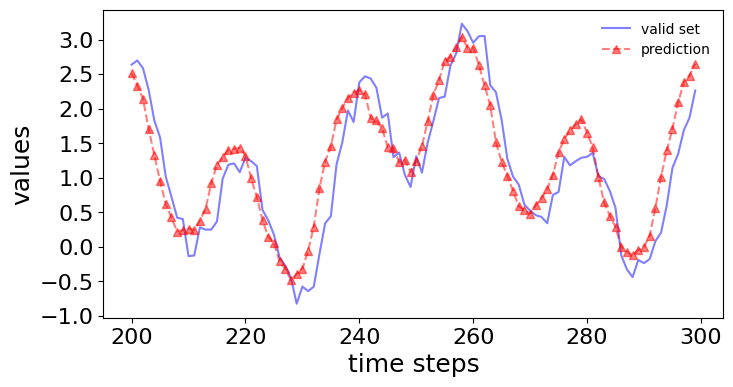

In [47]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(train_size + test_size, nt), y_valid, label='valid set', color='b',alpha=0.5)
plt.plot(np.arange(train_size + test_size, nt), y_pred, '--^', label='prediction', color='r',alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [48]:
y_pred.shape, y_valid.shape

((100,), (100,))

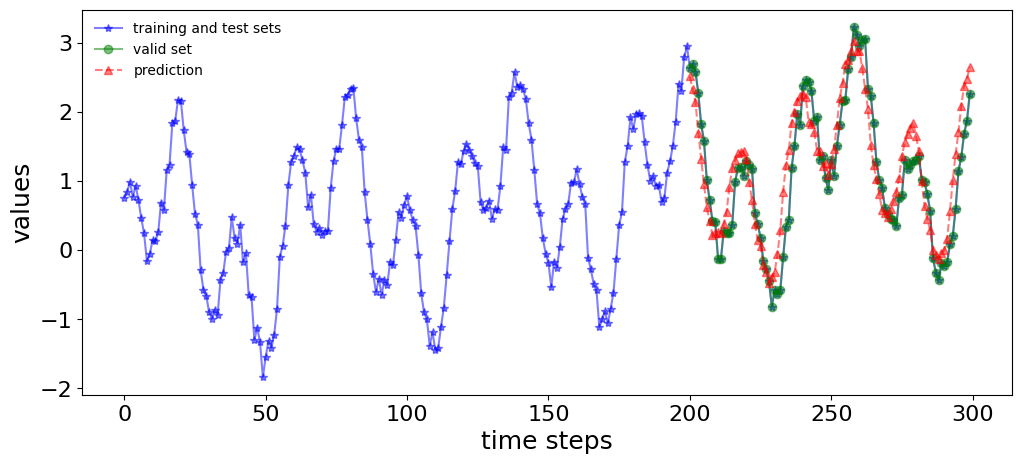

In [49]:
plt.figure(figsize=(12,5))
plt.plot(xt, x, '-*', label='training and test sets', color='b', alpha=0.5)
plt.plot(np.arange(train_size + test_size, nt), y_valid, '-o', label='valid set', color='g', alpha=0.5)
plt.plot(np.arange(train_size + test_size, nt), y_pred, '--^', label='prediction', color='red', alpha=0.5)
plt.xlabel('time steps', fontsize=18)
plt.ylabel('values', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend(frameon=False)
plt.show()

In [50]:
MSE = np.square(np.subtract(y_valid,y_pred)).mean() 

RMSE = np.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.4291232489011527
